In [1]:
#pip install wordcloud

In [2]:
import json
import pandas as pd
import datetime
import re
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import STOPWORDS as stopwords_wc

In [3]:
pd.set_option('display.max_colwidth', 100)

In [4]:
# Read the csv files containin gthe tweets by Eon Musk from 2010 to 2022.
df_2010 = pd.read_csv('../Data_Resources/elon_musk_kaggle/2010.csv')
df_2011 = pd.read_csv('../Data_Resources/elon_musk_kaggle/2011.csv')
df_2012 = pd.read_csv('../Data_Resources/elon_musk_kaggle/2012.csv')
df_2013 = pd.read_csv('../Data_Resources/elon_musk_kaggle/2013.csv')
df_2014 = pd.read_csv('../Data_Resources/elon_musk_kaggle/2014.csv')
df_2015 = pd.read_csv('../Data_Resources/elon_musk_kaggle/2015.csv')
df_2016 = pd.read_csv('../Data_Resources/elon_musk_kaggle/2016.csv')
df_2017 = pd.read_csv('../Data_Resources/elon_musk_kaggle/2017.csv')
df_2018 = pd.read_csv('../Data_Resources/elon_musk_kaggle/2018.csv')
df_2019 = pd.read_csv('../Data_Resources/elon_musk_kaggle/2019.csv')
df_2020 = pd.read_csv('../Data_Resources/elon_musk_kaggle/2020.csv')
df_2021 = pd.read_csv('../Data_Resources/elon_musk_kaggle/2021.csv')
df_2022 = pd.read_csv('../Data_Resources/elon_musk_kaggle/2022.csv')

In [5]:
print(f"shape of 2010 df: " + str(df_2010.shape))
print(f"shape of 2011 df: " + str(df_2012.shape))
print(f"shape of 2012 df: " + str(df_2012.shape))
print(f"shape of 2013 df: " + str(df_2013.shape))
print(f"shape of 2014 df: " + str(df_2014.shape))
print(f"shape of 2015 df: " + str(df_2015.shape))
print(f"shape of 2016 df: " + str(df_2016.shape))
print(f"shape of 2017 df: " + str(df_2017.shape))
print(f"shape of 2018 df: " + str(df_2018.shape))
print(f"shape of 2019 df: " + str(df_2019.shape))
print(f"shape of 2020 df: " + str(df_2020.shape))
print(f"shape of 2021 df: " + str(df_2021.shape))
print(f"shape of 2022 df: " + str(df_2022.shape))

shape of 2010 df: (1, 39)
shape of 2011 df: (313, 39)
shape of 2012 df: (313, 39)
shape of 2013 df: (737, 39)
shape of 2014 df: (923, 39)
shape of 2015 df: (1253, 39)
shape of 2016 df: (2000, 39)
shape of 2017 df: (3167, 39)
shape of 2018 df: (2285, 39)
shape of 2019 df: (8312, 39)
shape of 2020 df: (11717, 39)
shape of 2021 df: (3115, 36)
shape of 2022 df: (1028, 36)


In [6]:
df_2022

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1500030191837589510,1499972826828259328,2022-03-05 12:47:21 Arabian Standard Time,2022-03-05,12:47:21,400,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'SpacePadreIsle', 'name': 'SPadre', 'id': '1083699592699543552'}]",NaN,NaN,NaN,NaN
1,1500028396436340736,1499802655421448192,2022-03-05 12:40:13 Arabian Standard Time,2022-03-05,12:40:13,400,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'teslaownersSV', 'name': 'Tesla Silicon Valley Club', 'id': '101605998190738636...",NaN,NaN,NaN,NaN
2,1500026380704178178,1499972826828259328,2022-03-05 12:32:12 Arabian Standard Time,2022-03-05,12:32:12,400,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'SpacePadreIsle', 'name': 'SPadre', 'id': '1083699592699543552'}]",NaN,NaN,NaN,NaN
3,1500010328758923264,1499976967105433600,2022-03-05 11:28:25 Arabian Standard Time,2022-03-05,11:28:25,400,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'RationalEtienne', 'name': 'Pope of Muskanity', 'id': '2241150253'}, {'screen_n...",NaN,NaN,NaN,NaN
4,1499982913949081600,1499976967105433600,2022-03-05 09:39:29 Arabian Standard Time,2022-03-05,09:39:29,400,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'RogerYar', 'name': 'Дід Панас 🇺🇦', 'id': '2398672250'}]",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,1477775713172402176,1477775713172402176,2022-01-03 02:56:00 Arabian Standard Time,2022-01-03,02:56:00,400,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1024,1477706142461706248,1477706142461706248,2022-01-02 22:19:33 Arabian Standard Time,2022-01-02,22:19:33,400,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1025,1477700424933253123,1477700424933253123,2022-01-02 21:56:50 Arabian Standard Time,2022-01-02,21:56:50,400,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1026,1477096955658579974,1476958174439567360,2022-01-01 05:58:52 Arabian Standard Time,2022-01-01,05:58:52,400,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'BLKMDL3', 'name': 'Zack', 'id': '988975103785365504'}, {'screen_name': 'Tesla'...",NaN,NaN,NaN,NaN


In [7]:
df_2021

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1476662222617251846,1476620230692679680,2021-12-31 01:11:23 Arabian Standard Time,2021-12-31,01:11:23,400,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'roshanpateI', 'name': 'Roshan Patel', 'id': '816354391880040450'}]",NaN,NaN,NaN,NaN
1,1476656306610216960,1476644467578859528,2021-12-31 00:47:53 Arabian Standard Time,2021-12-31,00:47:53,400,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'tesla_raj', 'name': 'Tesla Raj', 'id': '1061504849420836865'}]",NaN,NaN,NaN,NaN
2,1476651519986614281,1476252898115964928,2021-12-31 00:28:51 Arabian Standard Time,2021-12-31,00:28:51,400,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'CSmithson80', 'name': 'Chris Smithson', 'id': '2904581459'}, {'screen_name': '...",NaN,NaN,NaN,NaN
3,1476619907076923398,1476252898115964928,2021-12-30 22:23:14 Arabian Standard Time,2021-12-30,22:23:14,400,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'BLKMDL3', 'name': 'Zack', 'id': '988975103785365504'}, {'screen_name': 'mims',...",NaN,NaN,NaN,NaN
4,1476618021024190474,1476252898115964928,2021-12-30 22:15:45 Arabian Standard Time,2021-12-30,22:15:45,400,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'mims', 'name': 'Christopher Mims 🤌', 'id': '1769191'}]",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3110,1345384139969552389,1345382294966571008,2021-01-02 18:59:09 Arabian Standard Time,2021-01-02,18:59:09,400,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'flcnhvy', 'name': 'Viv ✶', 'id': '1060180551544528897'}]",NaN,NaN,NaN,NaN
3111,1345382294966571008,1345382294966571008,2021-01-02 18:51:49 Arabian Standard Time,2021-01-02,18:51:49,400,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3112,1345344958710992897,1345334831719337984,2021-01-02 16:23:28 Arabian Standard Time,2021-01-02,16:23:28,400,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'newscientist', 'name': 'New Scientist', 'id': '19658826'}]",NaN,NaN,NaN,NaN
3113,1345208391958888448,1344675033231237120,2021-01-02 07:20:48 Arabian Standard Time,2021-01-02,07:20:48,400,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'comma_ai', 'name': 'comma', 'id': '4576936579'}]",NaN,NaN,NaN,NaN


In [8]:
df_2022['new_date']= pd.to_datetime(df_2022['date'] + ' ' + df_2022['time'])
df_2021['new_date']= pd.to_datetime(df_2021['date'] + ' ' + df_2021['time'])

In [9]:
df_2022['new_date']

0      2022-03-05 12:47:21
1      2022-03-05 12:40:13
2      2022-03-05 12:32:12
3      2022-03-05 11:28:25
4      2022-03-05 09:39:29
               ...        
1023   2022-01-03 02:56:00
1024   2022-01-02 22:19:33
1025   2022-01-02 21:56:50
1026   2022-01-01 05:58:52
1027   2022-01-01 04:53:13
Name: new_date, Length: 1028, dtype: datetime64[ns]

In [10]:
df_2022['new_date'] = df_2022['new_date'] - datetime.timedelta(hours=4)
df_2021['new_date'] = df_2021['new_date'] - datetime.timedelta(hours=4)
df_2022['new_date'] 

0      2022-03-05 08:47:21
1      2022-03-05 08:40:13
2      2022-03-05 08:32:12
3      2022-03-05 07:28:25
4      2022-03-05 05:39:29
               ...        
1023   2022-01-02 22:56:00
1024   2022-01-02 18:19:33
1025   2022-01-02 17:56:50
1026   2022-01-01 01:58:52
1027   2022-01-01 00:53:13
Name: new_date, Length: 1028, dtype: datetime64[ns]

In [11]:
df_2022 = df_2022.drop(columns=['date','time'], axis=1)
df_2021 = df_2021.drop(columns=['date','time'], axis=1)

In [12]:
df_2022 = df_2022.rename(columns={"new_date":"date"})
df_2021 = df_2021.rename(columns={"new_date":"date"})
df_2022

,id,conversation_id,created_at,timezone,user_id,username,name,place,tweet,language,...,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,date
0,1500030191837589510,1499972826828259328,2022-03-05 12:47:21 Arabian Standard Time,400,44196397,elonmusk,Elon Musk,NaN,"@SpacePadreIsle In a way, this is free QA haha",en,...,NaN,NaN,NaN,NaN,"[{'screen_name': 'SpacePadreIsle', 'name': 'SPadre', 'id': '1083699592699543552'}]",NaN,NaN,NaN,NaN,2022-03-05 08:47:21
1,1500028396436340736,1499802655421448192,2022-03-05 12:40:13 Arabian Standard Time,400,44196397,elonmusk,Elon Musk,NaN,@teslaownersSV A beautiful home for life,en,...,NaN,NaN,NaN,NaN,"[{'screen_name': 'teslaownersSV', 'name': 'Tesla Silicon Valley Club', 'id': '101605998190738636...",NaN,NaN,NaN,NaN,2022-03-05 08:40:13
2,1500026380704178178,1499972826828259328,2022-03-05 12:32:12 Arabian Standard Time,400,44196397,elonmusk,Elon Musk,NaN,@SpacePadreIsle Some Starlink terminals near conflict areas were being jammed for several hours ...,en,...,NaN,NaN,NaN,NaN,"[{'screen_name': 'SpacePadreIsle', 'name': 'SPadre', 'id': '1083699592699543552'}]",NaN,NaN,NaN,NaN,2022-03-05 08:32:12
3,1500010328758923264,1499976967105433600,2022-03-05 11:28:25 Arabian Standard Time,400,44196397,elonmusk,Elon Musk,NaN,@RationalEtienne @RogerYar Exactly,en,...,NaN,NaN,NaN,NaN,"[{'screen_name': 'RationalEtienne', 'name': 'Pope of Muskanity', 'id': '2241150253'}, {'screen_n...",NaN,NaN,NaN,NaN,2022-03-05 07:28:25
4,1499982913949081600,1499976967105433600,2022-03-05 09:39:29 Arabian Standard Time,400,44196397,elonmusk,Elon Musk,NaN,"@RogerYar All news sources are partially propaganda, some more than others",en,...,NaN,NaN,NaN,NaN,"[{'screen_name': 'RogerYar', 'name': 'Дід Панас 🇺🇦', 'id': '2398672250'}]",NaN,NaN,NaN,NaN,2022-03-05 05:39:29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,1477775713172402176,1477775713172402176,2022-01-03 02:56:00 Arabian Standard Time,400,44196397,elonmusk,Elon Musk,NaN,https://t.co/LA9hPzVlGx,und,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,2022-01-02 22:56:00
1024,1477706142461706248,1477706142461706248,2022-01-02 22:19:33 Arabian Standard Time,400,44196397,elonmusk,Elon Musk,NaN,Let’s make the roaring 20’s happen!,en,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,2022-01-02 18:19:33
1025,1477700424933253123,1477700424933253123,2022-01-02 21:56:50 Arabian Standard Time,400,44196397,elonmusk,Elon Musk,NaN,Great work by Tesla team worldwide!,en,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,2022-01-02 17:56:50
1026,1477096955658579974,1476958174439567360,2022-01-01 05:58:52 Arabian Standard Time,400,44196397,elonmusk,Elon Musk,NaN,@BLKMDL3 @Tesla 🔥,und,...,NaN,NaN,NaN,NaN,"[{'screen_name': 'BLKMDL3', 'name': 'Zack', 'id': '988975103785365504'}, {'screen_name': 'Tesla'...",NaN,NaN,NaN,NaN,2022-01-01 01:58:52


### From the above o/p I see that all the dataframes have the same number of columns (39) except for 2021 and 2022 (36). 

In [13]:
# Rename and make all columns with same names

df_2010 = df_2010[['id','date','tweet','nreplies','nlikes','nretweets']]
df_2011 = df_2011[['id','date','tweet','nreplies','nlikes','nretweets']]
df_2012 = df_2012[['id','date','tweet','nreplies','nlikes','nretweets']]
df_2013 = df_2013[['id','date','tweet','nreplies','nlikes','nretweets']]
df_2014 = df_2014[['id','date','tweet','nreplies','nlikes','nretweets']]
df_2015 = df_2015[['id','date','tweet','nreplies','nlikes','nretweets']]
df_2016 = df_2016[['id','date','tweet','nreplies','nlikes','nretweets']]
df_2017 = df_2017[['id','date','tweet','nreplies','nlikes','nretweets']]
df_2018 = df_2018[['id','date','tweet','nreplies','nlikes','nretweets']]
df_2019 = df_2019[['id','date','tweet','nreplies','nlikes','nretweets']]
df_2020 = df_2020[['id','date','tweet','nreplies','nlikes','nretweets']]
df_2021 = df_2021[['id','date','tweet','replies_count','likes_count','retweets_count']]
df_2022 = df_2022[['id','date','tweet','replies_count','likes_count','retweets_count']]

df_2021.rename(columns = {'replies_count':'nreplies', 'likes_count':'nlikes','retweets_count':'nretweets'}, inplace = True)
df_2022.rename(columns = {'replies_count':'nreplies', 'likes_count':'nlikes','retweets_count':'nretweets'}, inplace = True)

C:\Users\tamie\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [14]:
df_2010.columns

Index(['id', 'date', 'tweet', 'nreplies', 'nlikes', 'nretweets'], dtype='object')

In [15]:
df_2022.columns

Index(['id', 'date', 'tweet', 'nreplies', 'nlikes', 'nretweets'], dtype='object')

In [16]:
df_2022['date']

0      2022-03-05 08:47:21
1      2022-03-05 08:40:13
2      2022-03-05 08:32:12
3      2022-03-05 07:28:25
4      2022-03-05 05:39:29
               ...        
1023   2022-01-02 22:56:00
1024   2022-01-02 18:19:33
1025   2022-01-02 17:56:50
1026   2022-01-01 01:58:52
1027   2022-01-01 00:53:13
Name: date, Length: 1028, dtype: datetime64[ns]

In [17]:
# df_2022['date'] = pd.to_datetime(df_2022['date'])- datetime.timedelta(hours=3)
# df_2021['date'] = pd.to_datetime(df_2021['date'])- datetime.timedelta(hours=3)
# df_2022['date']

In [18]:
df_tweets = pd.concat([df_2010,df_2011,df_2012,df_2013,df_2014,df_2015,df_2016,df_2017,df_2018,df_2019,df_2020,df_2021,df_2022],axis = 0)

In [19]:
df_tweets.shape

(34878, 6)

In [20]:
df_tweets['date'] = pd.to_datetime(df_tweets['date']) 
df_tweets['date']

0      2010-06-04 18:31:57
0      2011-12-28 22:27:08
1      2011-12-27 23:38:55
2      2011-12-26 16:29:50
3      2011-12-26 16:23:04
               ...        
1023   2022-01-02 22:56:00
1024   2022-01-02 18:19:33
1025   2022-01-02 17:56:50
1026   2022-01-01 01:58:52
1027   2022-01-01 00:53:13
Name: date, Length: 34878, dtype: datetime64[ns]

In [21]:
df_tweets['date'] = df_tweets['date'] - datetime.timedelta(hours=6)
df_tweets['date']

0      2010-06-04 12:31:57
0      2011-12-28 16:27:08
1      2011-12-27 17:38:55
2      2011-12-26 10:29:50
3      2011-12-26 10:23:04
               ...        
1023   2022-01-02 16:56:00
1024   2022-01-02 12:19:33
1025   2022-01-02 11:56:50
1026   2021-12-31 19:58:52
1027   2021-12-31 18:53:13
Name: date, Length: 34878, dtype: datetime64[ns]

In [22]:
df_tweets.head()

,id,date,tweet,nreplies,nlikes,nretweets
0,15434727182,2010-06-04 12:31:57,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391,4652,348
0,152153637639028736,2011-12-28 16:27:08,@TheOnion So true :),7,12,1
1,151809315026636800,2011-12-27 17:38:55,If you ever wanted to know the *real* truth about the moon landings ...(best Onion article ever)...,13,39,34
2,151338939389706242,2011-12-26 10:29:50,Walked around a neighborhood recently rebuilt with help from APJ and others http://t.co/KYHjsS1k,9,155,18
3,151337237429239808,2011-12-26 10:23:04,"It was Xmas, so we brought presents for the kids at the orphanage. They don't usually get much. ...",15,158,13


In [23]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34878 entries, 0 to 1027
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         34878 non-null  int64         
 1   date       34878 non-null  datetime64[ns]
 2   tweet      34878 non-null  object        
 3   nreplies   34878 non-null  int64         
 4   nlikes     34878 non-null  int64         
 5   nretweets  34878 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 1.9+ MB


In [24]:
df_elon_tweets = pd.read_csv('../Data_Resources/tweets_scrapped/elon_tweets_5.csv')
df_elon_tweets.columns

Index(['Unnamed: 0', 'tweetID', 'date', 'fullText', 'likesCount',
       'retweetCount'],
      dtype='object')

In [25]:
# df_elon_tweets = df_elon_tweets.loc[df_elon_tweets['date']>='2022-03-05']

In [26]:
df_elon_tweets['date'] = pd.to_datetime(df_elon_tweets['date'])
df_elon_tweets['date']

0      2022-08-01 17:28:24+00:00
1      2022-08-01 17:18:42+00:00
2      2022-08-01 07:31:08+00:00
3      2022-08-01 06:24:54+00:00
4      2022-08-01 06:23:56+00:00
                  ...           
3215   2021-10-15 03:18:00+00:00
3216   2021-10-14 20:10:16+00:00
3217   2021-10-14 20:06:39+00:00
3218   2021-10-14 20:05:28+00:00
3219   2021-10-14 16:42:41+00:00
Name: date, Length: 3220, dtype: datetime64[ns, UTC]

In [27]:
df_elon_tweets['date'] = df_elon_tweets['date'] - datetime.timedelta(hours=6)
df_elon_tweets['date']

0      2022-08-01 11:28:24+00:00
1      2022-08-01 11:18:42+00:00
2      2022-08-01 01:31:08+00:00
3      2022-08-01 00:24:54+00:00
4      2022-08-01 00:23:56+00:00
                  ...           
3215   2021-10-14 21:18:00+00:00
3216   2021-10-14 14:10:16+00:00
3217   2021-10-14 14:06:39+00:00
3218   2021-10-14 14:05:28+00:00
3219   2021-10-14 10:42:41+00:00
Name: date, Length: 3220, dtype: datetime64[ns, UTC]

In [28]:
df_elon_tweets['date'] = df_elon_tweets['date'].dt.date

In [29]:
df_elon_tweets=df_elon_tweets.drop(df_elon_tweets.columns[0], axis=1)

In [30]:
df_elon_tweets.rename(columns = {'tweetID':'id','fullText':'tweet','likesCount':'nlikes','retweetCount':'nretweets'}, inplace = True)
df_elon_tweets

,id,date,tweet,nlikes,nretweets
0,1554157110136537088,2022-08-01,@spideycyp_155 So much water under the bridge since then,135,13
1,1554154670096015361,2022-08-01,https://t.co/RmXlZHKEKc,5596,392
2,1554006801057808384,2022-08-01,@teslaownersSV Yeah,4888,135
3,1553990132662927362,2022-08-01,@teslaownersSV @BillyM2k @WholeMarsBlog Maybe Twitter can become that,3110,193
4,1553989890177748994,2022-08-01,"@teslaownersSV @BillyM2k @WholeMarsBlog It sure is hard to find a news source that’s accurate, r...",3713,252
...,...,...,...,...,...
3215,1448850617661861916,2021-10-14,Beta 10.3 releasing Friday next week to all cars with 99/100 safety score,24849,1248
3216,1448742977229127680,2021-10-14,@AstroDebora @archillect Pretty much :),4001,129
3217,1448742065358073864,2021-10-14,@archillect Fan art is the best,16303,498
3218,1448741766312587264,2021-10-14,@PPathole LASIK has improved so many people’s lives!,8552,314


In [31]:
df_tweets

,id,date,tweet,nreplies,nlikes,nretweets
0,15434727182,2010-06-04 12:31:57,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391,4652,348
0,152153637639028736,2011-12-28 16:27:08,@TheOnion So true :),7,12,1
1,151809315026636800,2011-12-27 17:38:55,If you ever wanted to know the *real* truth about the moon landings ...(best Onion article ever)...,13,39,34
2,151338939389706242,2011-12-26 10:29:50,Walked around a neighborhood recently rebuilt with help from APJ and others http://t.co/KYHjsS1k,9,155,18
3,151337237429239808,2011-12-26 10:23:04,"It was Xmas, so we brought presents for the kids at the orphanage. They don't usually get much. ...",15,158,13
...,...,...,...,...,...,...
1023,1477775713172402176,2022-01-02 16:56:00,https://t.co/LA9hPzVlGx,25611,473530,51383
1024,1477706142461706248,2022-01-02 12:19:33,Let’s make the roaring 20’s happen!,22500,320201,26951
1025,1477700424933253123,2022-01-02 11:56:50,Great work by Tesla team worldwide!,5630,66405,4459
1026,1477096955658579974,2021-12-31 19:58:52,@BLKMDL3 @Tesla 🔥,1074,45704,472


In [32]:
df_tweets_new = pd.concat([df_tweets,df_elon_tweets],axis=0)

df_tweets_new.shape

(38098, 6)

In [33]:
df_tweets_new['id'] = df_tweets_new['id'].map(str)

In [34]:
# df_tweets_new.dtypes

In [35]:
# # ensuring time is in datetime format
# df_tweets_new['date'] = pd.to_datetime(df_tweets_new['date'])


In [36]:
#converting time from UTC to CST

#df_tweets_new['date'] = df_tweets_new['date'] - datetime.timedelta(hours=6)

In [37]:
#Convert the date column from string to "datetime" column. extracting just the date.

df_tweets_new['date'] = pd.to_datetime(df_tweets_new['date']).dt.date
df_tweets_new.head()

,id,date,tweet,nreplies,nlikes,nretweets
0,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348
0,152153637639028736,2011-12-28,@TheOnion So true :),7.0,12,1
1,151809315026636800,2011-12-27,If you ever wanted to know the *real* truth about the moon landings ...(best Onion article ever)...,13.0,39,34
2,151338939389706242,2011-12-26,Walked around a neighborhood recently rebuilt with help from APJ and others http://t.co/KYHjsS1k,9.0,155,18
3,151337237429239808,2011-12-26,"It was Xmas, so we brought presents for the kids at the orphanage. They don't usually get much. ...",15.0,158,13


In [38]:
df_tweets_new.shape

(38098, 6)

In [39]:
# Let us sort the dates in ascending order.
df_tweets_new.sort_values(by=['date'], inplace=True, ascending=True)
df_tweets_new.reset_index(drop=True, inplace=True)
df_tweets_new.head(20)

,id,date,tweet,nreplies,nlikes,nretweets
0,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348
1,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348
2,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348
3,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348
4,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348
5,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348
6,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348
7,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348
8,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348
9,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348


#### After sorting the records in ascending order, we see a lot of duplicate records. These duplicate records need to be removed.

In [40]:
#Checking for duplicate records
df_tweets_new[df_tweets_new.duplicated(keep='first')][:10]

,id,date,tweet,nreplies,nlikes,nretweets
1,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348
2,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348
3,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348
4,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348
5,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348
6,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348
7,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348
8,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348
9,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348
12,142179928203460608,2011-12-01,"Went to Iceland on Sat to ride bumper cars on ice! No, not the country, Vlad's rink in Van Nuys...",32.0,189,15


In [41]:
#Drop duplicate records from the dataframe and reset the index
df_tweets_final = df_tweets_new.drop_duplicates(keep='first')
df_tweets_final.reset_index(drop=True, inplace=True)
df_tweets_final.head(15)

,id,date,tweet,nreplies,nlikes,nretweets
0,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348
1,142188458125963264,2011-12-01,I made the volume on the Model S http://t.co/wMCnT53M go to 11. Now I just need to work in a m...,31.0,78,9
2,142179928203460608,2011-12-01,"Went to Iceland on Sat to ride bumper cars on ice! No, not the country, Vlad's rink in Van Nuys...",32.0,189,15
3,142881284019060736,2011-12-03,That was a total non sequitur btw,31.0,53,6
4,143171132814671872,2011-12-03,Am reading a great biography of Ben Franklin by Isaacson. Highly recommended.,17.0,65,9
5,142880871391838208,2011-12-03,"Great Voltaire quote, arguably better than Twain. Hearing news of his own death, Voltaire replie...",7.0,29,25
6,149441101684686848,2011-12-21,His singing and acting talent will be sorely missed: http://t.co/IIFKob75 South Park sequel co...,6.0,32,2
7,149436471764459520,2011-12-21,Sam Harris also wrote a nice piece on the awesomeness of Hitchens: http://t.co/fPkLiK3v May the...,12.0,103,21
8,149439686702661632,2011-12-21,Why does the crowd cry over the glorious leader Kim Il Sung's death? Fear of being shot may pla...,20.0,23,9
9,149444078210256896,2011-12-21,"Got called randomly by Kanye West today and received a download of his thoughts, ranging from sh...",19.0,1068,546


In [42]:
print(df_tweets_final.shape)

(21099, 6)


#### After dropping the duplicate records we see that only half of the records remain. Let us no clean the tweets, ie remove all the #,@ symbols. 

In [43]:
#Lets clean the tweets (remove @'s' and urls and)
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
new = []
for t in df_tweets_final.tweet:
    words = t.split()
    t = t.split()
    t = ' '.join(word for word in t if not word.startswith('@'))
    t = t.split()
    t = ' '.join(word for word in t if not word.startswith('http'))
    new.append(t)
    
df_tweets_final['tweet'] = new
df_tweets_final

C:\Users\tamie\AppData\Local\Temp/ipykernel_37564/2675060673.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets_final['tweet'] = new


,id,date,tweet,nreplies,nlikes,nretweets
0,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348
1,142188458125963264,2011-12-01,I made the volume on the Model S go to 11. Now I just need to work in a miniature Stonehenge...,31.0,78,9
2,142179928203460608,2011-12-01,"Went to Iceland on Sat to ride bumper cars on ice! No, not the country, Vlad's rink in Van Nuys....",32.0,189,15
3,142881284019060736,2011-12-03,That was a total non sequitur btw,31.0,53,6
4,143171132814671872,2011-12-03,Am reading a great biography of Ben Franklin by Isaacson. Highly recommended.,17.0,65,9
...,...,...,...,...,...,...
21094,1553989890177748994,2022-08-01,"It sure is hard to find a news source that’s accurate, relevant &amp; not totally depressing! Ol...",NaN,3713,252
21095,1553990132662927362,2022-08-01,Maybe Twitter can become that,NaN,3110,193
21096,1554154670096015361,2022-08-01,,NaN,5596,392
21097,1554157110136537088,2022-08-01,So much water under the bridge since then,NaN,135,13


In [44]:
pd.DatetimeIndex(df_tweets_final["date"]).year

Int64Index([2010, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011,
            ...
            2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
           dtype='int64', name='date', length=21099)

### Visualize the number of tweets from 2010 to 2022 of Elon Musk

In [45]:
# Get the number of tweets every year by Elon Musk
date_count_df = df_tweets_final.groupby(pd.DatetimeIndex(df_tweets_final["date"]).year)["tweet"].count()
date_count_df = date_count_df.to_frame()
date_count_df

,tweet
date,
2010,1
2011,42
2012,272
2013,422
2014,188
2015,329
2016,753
2017,1170
2018,4582


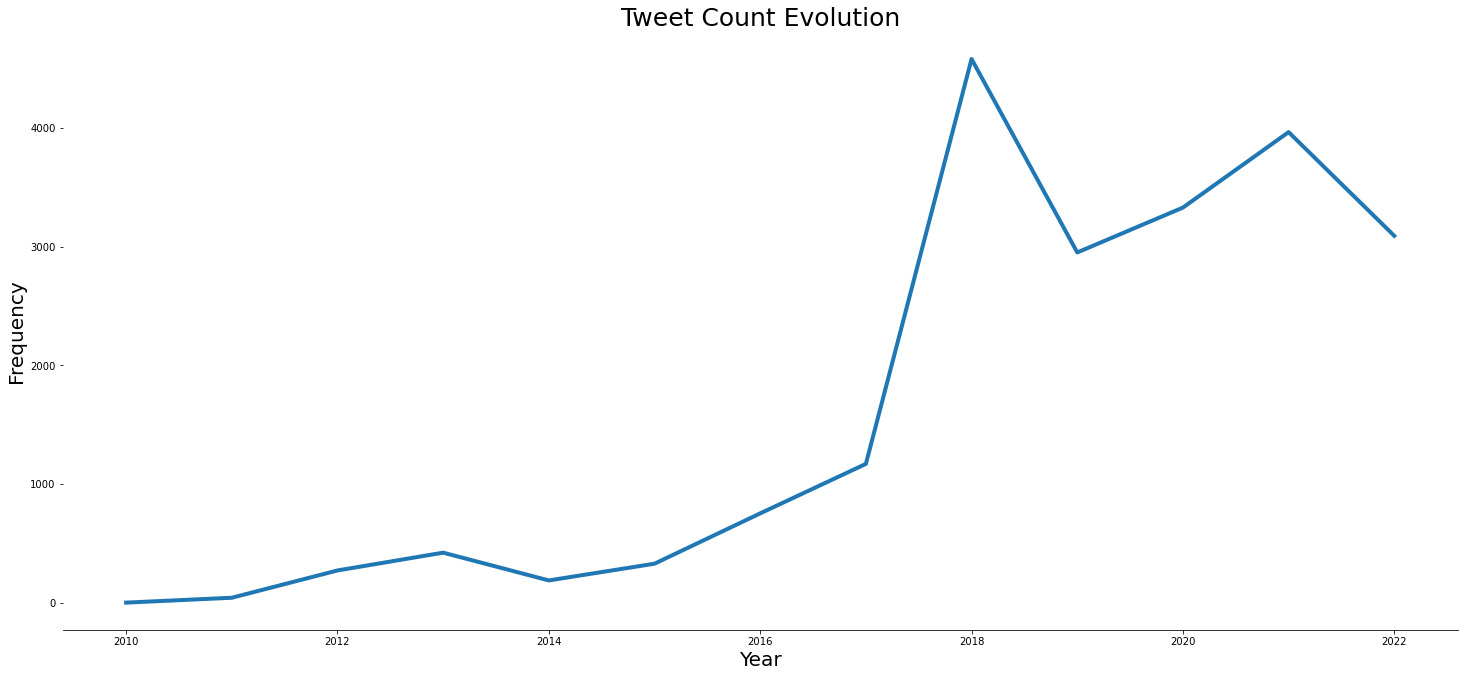

In [46]:
# Plot
plt.figure(figsize=(25, 11))
ax = sns.lineplot(data=date_count_df, x= "date", y= "tweet", lw=4)
plt.title("Tweet Count Evolution", size=25)
plt.xlabel("Year", size=20)
plt.ylabel("Frequency", size=20)
sns.despine(left=True)

### The number of tweets by Elon Musk kept increasing every year from 2010. Maximum number of tweets were generated in year 2018.

In [47]:
#Filter the dogecoin tweets from the df_tweets_new dataset
def filterTweetData(financialType=''):
    df = pd.DataFrame(columns = ['Date', 'Tweet'])

    for i in range(len(df_tweets_final)):
        cur = df_tweets_final.loc[i].tweet
        cur = cur.lower()
        if financialType in cur:
            df = df.append({'id' :df_tweets_final.loc[i].id,
                            'Date' : df_tweets_final.loc[i].date, 
                            'Tweet' : df_tweets_final.loc[i].tweet, 
                            'nlikes':df_tweets_final.loc[i].nlikes,
                            'nreplies':df_tweets_final.loc[i].nreplies,
                            'nretweets':df_tweets_final.loc[i].nretweets
                                     },
                    ignore_index = True)

    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
    df
    return df

### Filter the tweets containing the word "doge"

In [48]:
df_doge = filterTweetData('doge')

In [49]:
df_doge

,Date,Tweet,id,nlikes,nreplies,nretweets
0,2019-04-02,Dogecoin might be my fav cryptocurrency. It’s pretty cool.,1113009339743100929,9063.0,558.0,2428.0
1,2019-04-02,Dogecoin rulz,1113173498384441344,138893.0,1732.0,16539.0
2,2019-04-02,Dogecoin value may vary,1113178951403180032,20160.0,1080.0,1959.0
3,2020-04-25,Dogecoin Mode,1254039929333649409,2192.0,124.0,207.0
4,2020-07-17,"Excuse me, I only sell Doge!",1284290215561986048,15930.0,416.0,775.0
...,...,...,...,...,...,...
84,2022-05-27,"Tesla merch can be bought with Doge, soon SpaceX merch too",1530209049261658112,202883.0,NaN,19421.0
85,2022-05-31,And Palmer always forgets to mention that he never wrote a single line of Dogecoin code …,1531696049064116225,3649.0,NaN,309.0
86,2022-05-31,You’re humble bro. Billy’s sense of humor &amp; irreverence is a big part of why people love Dog...,1531699416490557440,12139.0,NaN,1224.0
87,2022-06-19,I will keep supporting Dogecoin,1538406040374595585,395787.0,NaN,37200.0


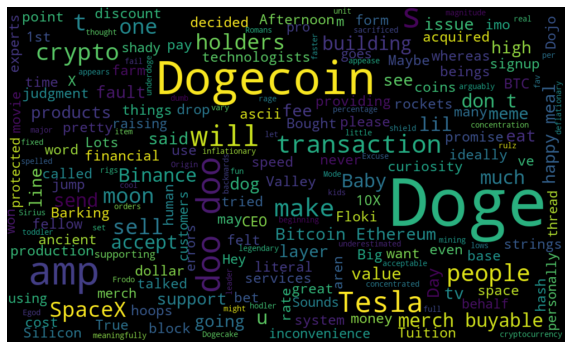

In [50]:
plt.figure(figsize=(10,8))
allWords = ' '.join([twts for twts in df_doge["Tweet"]])
wordCloud = WordCloud(width = 1000, height = 600, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [51]:
# Get the number of tweets every year by Elon Musk
date_doge_df = df_doge.groupby(pd.DatetimeIndex(df_doge["Date"]).year)["Tweet"].count()
date_doge_df = date_doge_df.to_frame()
date_doge_df

,Tweet
Date,
2019,3
2020,4
2021,69
2022,13


Text(0, 0.5, 'Frequency')

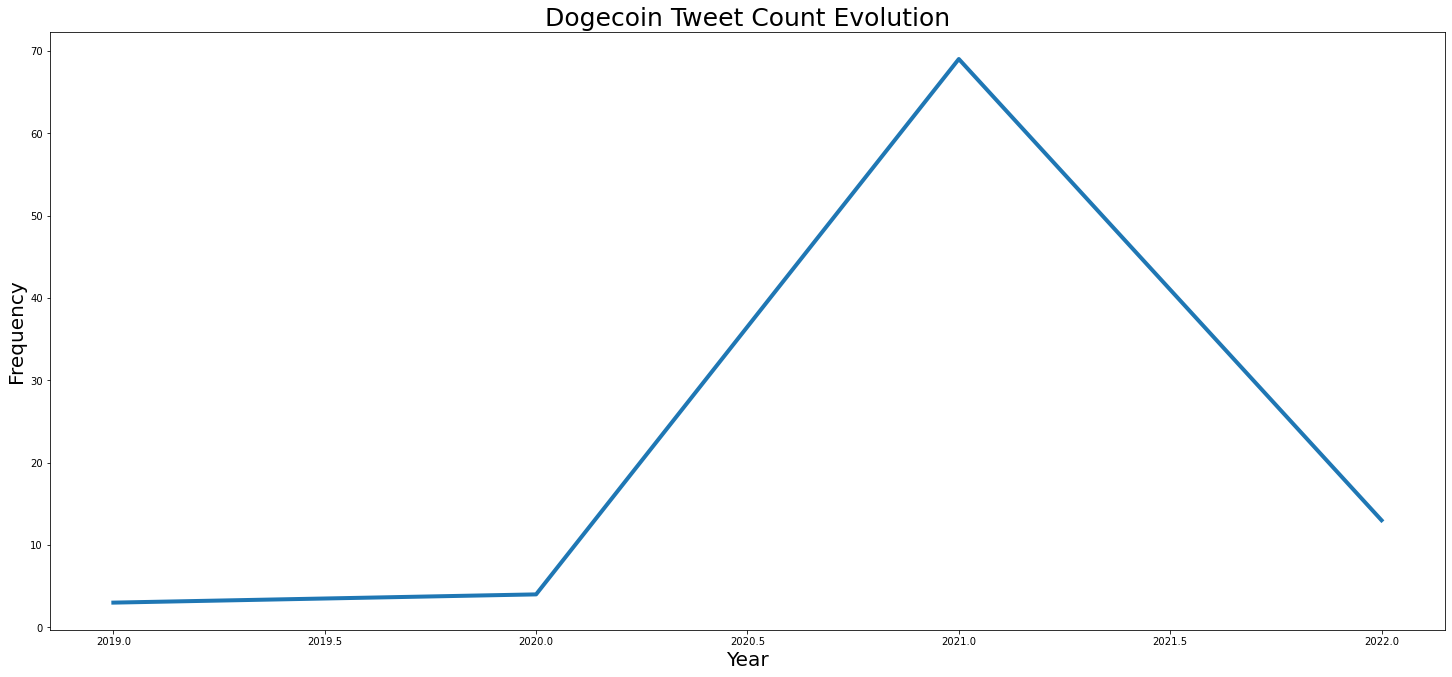

In [52]:
# Plot the number of tweets for dogecoing by elon musk
plt.figure(figsize=(25, 11))
ax = sns.lineplot(data=date_doge_df, x= "Date", y= "Tweet", lw=4)
plt.title("Dogecoin Tweet Count Evolution", size=25)
plt.xlabel("Year", size=20)
plt.ylabel("Frequency", size=20)
# sns.despine(left=True)

### Filter the tweets containing the word "tesla"

In [53]:
df_tesla = filterTweetData('tesla')

In [54]:
df_tesla

,Date,Tweet,id,nlikes,nreplies,nretweets
0,2011-12-31,Hacked my Tesla charge connector on a small island in the rain last night #whatcouldpossiblygowrong,153099684280410112,405.0,55.0,32.0
1,2012-01-10,"The exec conf room at Tesla used to be called Denali, but I decided to move a few letters around...",156927468836630528,315.0,32.0,67.0
2,2012-01-12,"A Tesla Roadster just passed the 100,000 mile mark for the first time and still has over 200 mil...",157700726515183616,15.0,5.0,51.0
3,2012-01-17,Will communicate better in the future. Too many people want us to fail and are willing to twist ...,159330976378519552,163.0,44.0,43.0
4,2012-01-17,That's not just paranoia (a healthy trait at times). Tesla really is under massive attack by sho...,159396536621596672,16.0,23.0,14.0
...,...,...,...,...,...,...
1664,2022-07-24,"WSJ has run so many bs hit pieces on me and Tesla I’ve lost count! It’s embarrassing for them, f...",1551392795545333760,26888.0,NaN,2910.0
1665,2022-07-25,All Teslas come with a free karaoke app,1551668848000114689,214317.0,NaN,12649.0
1666,2022-07-28,More Tesla commodity prices are trending down than up fwiw,1552814045354409985,50949.0,NaN,2344.0
1667,2022-07-29,Try voice command “open butthole” on your Tesla,1553195274264354816,152752.0,NaN,9735.0


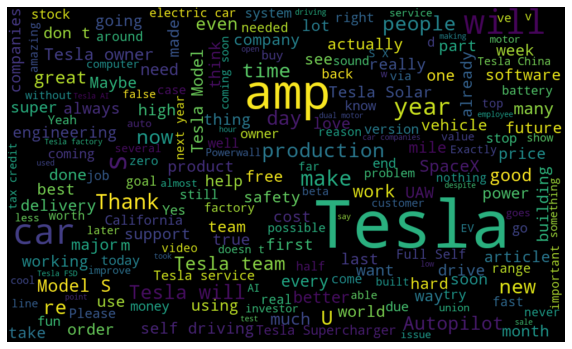

In [55]:
plt.figure(figsize=(10,8))
allWords = ' '.join([twts for twts in df_tesla["Tweet"]])
wordCloud = WordCloud(width = 1000, height = 600, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [56]:
# Get the number of tweets every year by Elon Musk
date_tesla_df = df_tesla.groupby(pd.DatetimeIndex(df_tesla["Date"]).year)["Tweet"].count()
date_tesla_df = date_tesla_df.to_frame()
date_tesla_df

,Tweet
Date,
2011,1
2012,30
2013,69
2014,29
2015,25
2016,80
2017,71
2018,505
2019,246


Text(0, 0.5, 'Frequency')

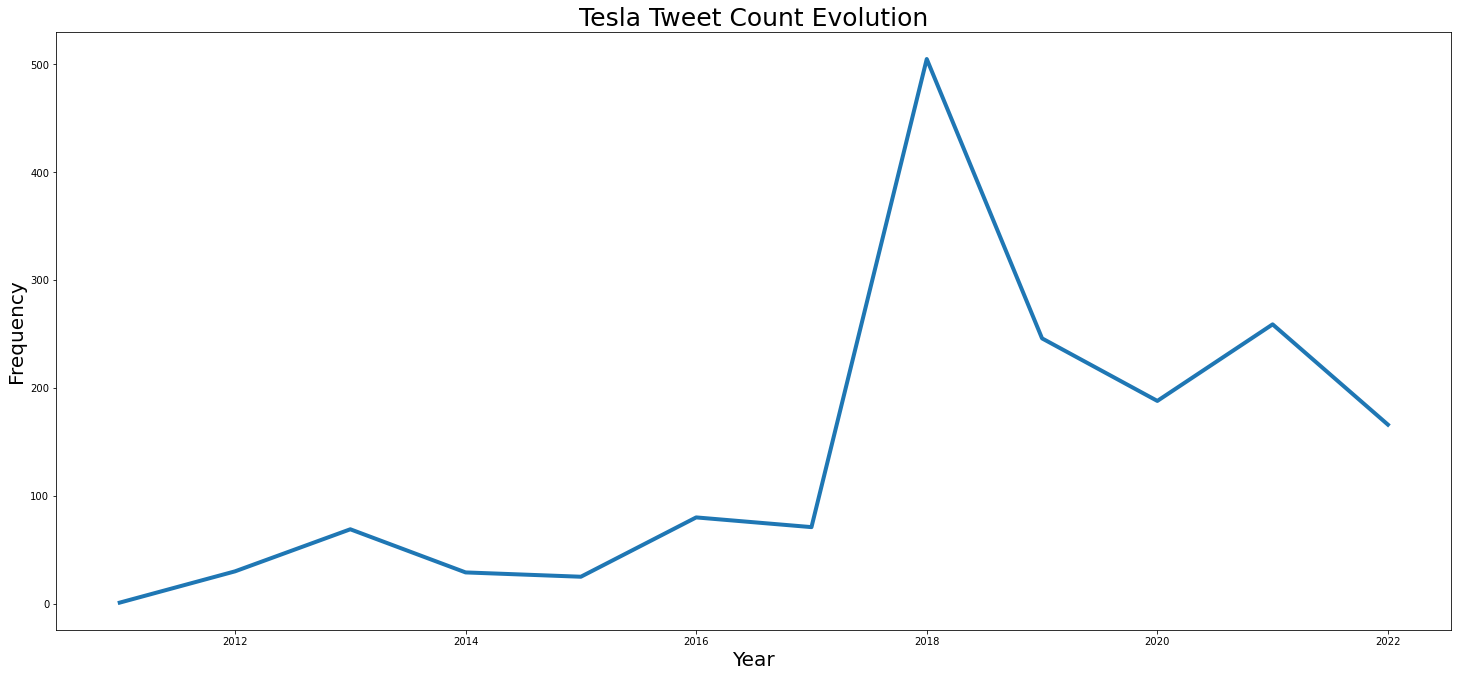

In [57]:
# Plot the number of tweets for spaceX by elon musk
plt.figure(figsize=(25, 11))
ax = sns.lineplot(data=date_tesla_df, x= "Date", y= "Tweet", lw=4)
plt.title("Tesla Tweet Count Evolution", size=25)
plt.xlabel("Year", size=20)
plt.ylabel("Frequency", size=20)

In [58]:
df_twitter = filterTweetData('twitter')

In [59]:
df_twitter

,Date,Tweet,id,nlikes,nreplies,nretweets
0,2015-05-22,What are the best riddles you've heard that are short enough for Twitter?,601669073441697792,599.0,638.0,208.0
1,2016-04-03,"Signing off from impromptu Twitter AMA. Thanks for the suggestions. Btw, we really will have mor...",716780425939521538,3252.0,241.0,367.0
2,2016-07-05,Exactly! I love Twitter.,750354728169644032,328.0,13.0,41.0
3,2016-10-04,I use twitter for news orgs. My Insta has same women as men. What's up with the phoney PC police...,783347230245736448,5254.0,312.0,1598.0
4,2016-10-05,"Yeah, and several others at various times. My twitter list is trimmed down to almost all news/co...",783842202220802048,225.0,20.0,16.0
...,...,...,...,...,...,...
161,2022-06-21,Twitter me &amp; real-life me are quite different haha!,1539292625433501702,146954.0,NaN,8622.0
162,2022-07-06,Can you say more about this: “… pressures that the government may have placed on Twitter …”,1544719143387238403,38887.0,NaN,4545.0
163,2022-07-30,Tesla + Twitter -&gt; Twizzler,1553380278407675905,260153.0,NaN,17759.0
164,2022-07-30,Interaction with almost all twitter accounts seem to be much lower in recent weeks &amp; days. A...,1553377779810459648,133974.0,NaN,7941.0


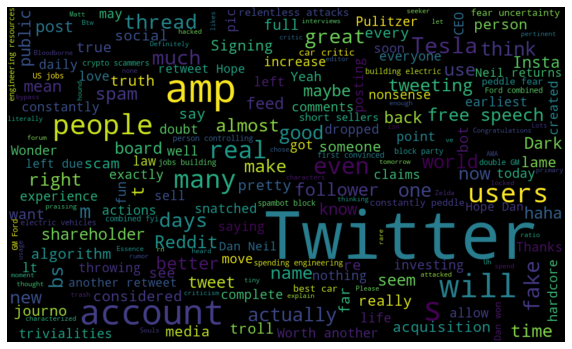

In [60]:
plt.figure(figsize=(10,8))
stopwords_wc = set(stopwords_wc)
allWords = ' '.join([twts for twts in df_twitter["Tweet"]])
wordCloud = WordCloud(stopwords=stopwords_wc, width = 1000, height = 600, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [61]:
# Get the number of tweets every year by Elon Musk
date_twitter_df = df_twitter.groupby(pd.DatetimeIndex(df_twitter["Date"]).year)["Tweet"].count()
date_twitter_df = date_twitter_df.to_frame()
date_twitter_df

,Tweet
Date,
2015,1
2016,4
2017,4
2018,43
2019,10
2020,15
2021,9
2022,80


Text(0, 0.5, 'Frequency')

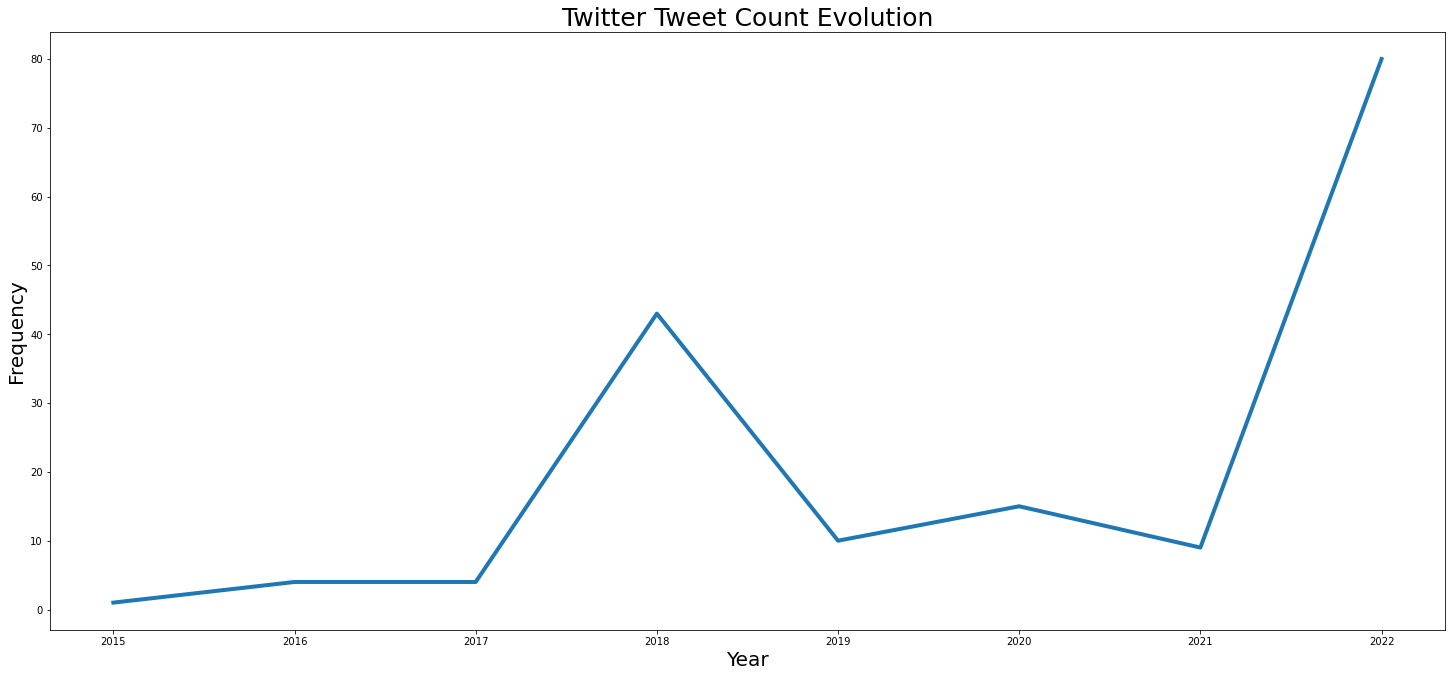

In [62]:
# Plot the number of tweets for Twitter by elon musk
plt.figure(figsize=(25, 11))
ax = sns.lineplot(data=date_twitter_df, x= "Date", y= "Tweet", lw=4)
plt.title("Twitter Tweet Count Evolution", size=25)
plt.xlabel("Year", size=20)
plt.ylabel("Frequency", size=20)

In [63]:
# # Get Popularity Information - to be looked by Shreha
# popularity = ["likes_count", "retweets_count", "replies_count"]
# popularity_df = tweets[tweets["year"]!="2021"].groupby("year").agg({popularity[0] : 'sum',
#                                                                     popularity[1] : 'sum',
#                                                                     popularity[2] : 'sum',
#                                                                     'tweet' : 'count'}).reset_index()
# popularity_df["likes_count"] = popularity_df["likes_count"]/popularity_df["tweet"]
# popularity_df["retweets_count"] = popularity_df["retweets_count"]/popularity_df["tweet"]
# popularity_df["replies_count"] = popularity_df["replies_count"]/popularity_df["tweet"]

# Database population - Prepare Data for storing in Database and append records

In [64]:
df_doge['financeType']='doge'
df_tesla['financeType']='tesla'
df_twitter['financeType']='twitter'


In [65]:
df_tweet_tostore = pd.concat([df_doge, df_tesla, df_twitter],axis=0,ignore_index=True)

In [66]:
 df_tweet_tostore.rename(columns = {'id':'tweetID','Date':'date','Tweet':'fullText','nlikes':'likesCount','nreplies':'replyCount','nretweets':'retweetCount'}, inplace = True)

In [67]:
 df_tweet_tostore

,date,fullText,tweetID,likesCount,replyCount,retweetCount,financeType
0,2019-04-02,Dogecoin might be my fav cryptocurrency. It’s pretty cool.,1113009339743100929,9063.0,558.0,2428.0,doge
1,2019-04-02,Dogecoin rulz,1113173498384441344,138893.0,1732.0,16539.0,doge
2,2019-04-02,Dogecoin value may vary,1113178951403180032,20160.0,1080.0,1959.0,doge
3,2020-04-25,Dogecoin Mode,1254039929333649409,2192.0,124.0,207.0,doge
4,2020-07-17,"Excuse me, I only sell Doge!",1284290215561986048,15930.0,416.0,775.0,doge
...,...,...,...,...,...,...,...
1919,2022-06-21,Twitter me &amp; real-life me are quite different haha!,1539292625433501702,146954.0,NaN,8622.0,twitter
1920,2022-07-06,Can you say more about this: “… pressures that the government may have placed on Twitter …”,1544719143387238403,38887.0,NaN,4545.0,twitter
1921,2022-07-30,Tesla + Twitter -&gt; Twizzler,1553380278407675905,260153.0,NaN,17759.0,twitter
1922,2022-07-30,Interaction with almost all twitter accounts seem to be much lower in recent weeks &amp; days. A...,1553377779810459648,133974.0,NaN,7941.0,twitter


In [68]:
# need to fix this reindexing and dataloss issue
df_tweet_tostore= df_tweet_tostore[["tweetID","financeType","date","fullText","replyCount","likesCount","retweetCount"]]
df_tweet_tostore

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount
0,1113009339743100929,doge,2019-04-02,Dogecoin might be my fav cryptocurrency. It’s pretty cool.,558.0,9063.0,2428.0
1,1113173498384441344,doge,2019-04-02,Dogecoin rulz,1732.0,138893.0,16539.0
2,1113178951403180032,doge,2019-04-02,Dogecoin value may vary,1080.0,20160.0,1959.0
3,1254039929333649409,doge,2020-04-25,Dogecoin Mode,124.0,2192.0,207.0
4,1284290215561986048,doge,2020-07-17,"Excuse me, I only sell Doge!",416.0,15930.0,775.0
...,...,...,...,...,...,...,...
1919,1539292625433501702,twitter,2022-06-21,Twitter me &amp; real-life me are quite different haha!,NaN,146954.0,8622.0
1920,1544719143387238403,twitter,2022-07-06,Can you say more about this: “… pressures that the government may have placed on Twitter …”,NaN,38887.0,4545.0
1921,1553380278407675905,twitter,2022-07-30,Tesla + Twitter -&gt; Twizzler,NaN,260153.0,17759.0
1922,1553377779810459648,twitter,2022-07-30,Interaction with almost all twitter accounts seem to be much lower in recent weeks &amp; days. A...,NaN,133974.0,7941.0


In [69]:
df_tweet_tostore['tweetID'].value_counts()

1022430321696858113    6
1498858611241635843    6
1454808104256737289    4
1452348126753349640    4
1470703708677840896    4
                      ..
1108890675922112512    1
1108630032153341952    1
1107029046095810561    1
1107009951266824192    1
1553990132662927362    1
Name: tweetID, Length: 1507, dtype: int64

In [70]:
duplicates = df_tweet_tostore['tweetID'].value_counts()[(df_tweet_tostore['tweetID'].value_counts()>1)].index.to_list()
duplicates

['1022430321696858113',
 '1498858611241635843',
 '1454808104256737289',
 '1452348126753349640',
 '1470703708677840896',
 '1481873421390680065',
 '1487144923593949186',
 '1487121182155550725',
 '1486880325871587329',
 '1485932186280906752',
 '1485953263040188416',
 '1494065800482902030',
 '1477700424933253123',
 '1498856948321722370',
 '1498940416053420037',
 '1499249339671089152',
 '1499909806504779779',
 '1492979939154538496',
 '1490120045028122624',
 '1491150551752769538',
 '1484456594775678976',
 '1489349857441726465',
 '1000208369959845889',
 '1000449499221803009',
 '998786412970369024',
 '1002056802127638528',
 '998459709446176768',
 '998454539941367808',
 '998449970528247808',
 '998953706673487873',
 '998996397570441216',
 '998988641702526977',
 '998984720783323136',
 '1001707195799621632',
 '1000332404618227712',
 '1000204113953439744',
 '999370318383742976',
 '999378223661137920',
 '999385249720057856',
 '999466717112745985',
 '999364333674024960',
 '1000431923502530560',
 '100

In [71]:
for tweet_id in duplicates:
    
    duplicate_df = df_tweet_tostore[(df_tweet_tostore['tweetID'] == tweet_id)]
    max_reply_Count = duplicate_df["replyCount"].max()
    max_likes_Count = duplicate_df["likesCount"].max()
    max_retweet_Count = duplicate_df["retweetCount"].max()
    print(duplicate_df)
    
    for index in duplicate_df.index:
        df_tweet_tostore["replyCount"][index] = max_reply_Count
        df_tweet_tostore["likesCount"][index] = max_likes_Count
        df_tweet_tostore["retweetCount"][index] = max_retweet_Count
        

                  tweetID financeType       date  \
642   1022430321696858113       tesla 2018-07-26   
643   1022430321696858113       tesla 2018-07-26   
644   1022430321696858113       tesla 2018-07-26   
1785  1022430321696858113     twitter 2018-07-26   
1786  1022430321696858113     twitter 2018-07-26   
1787  1022430321696858113     twitter 2018-07-26   

                                                                                                 fullText  \
642   Worth another retweet. Hope Dan Neil returns to Twitter. He left due to relentless attacks from ...   
643   Worth another retweet. Hope Dan Neil returns to Twitter. He left due to relentless attacks from ...   
644   Worth another retweet. Hope Dan Neil returns to Twitter. He left due to relentless attacks from ...   
1785  Worth another retweet. Hope Dan Neil returns to Twitter. He left due to relentless attacks from ...   
1786  Worth another retweet. Hope Dan Neil returns to Twitter. He left due to relentless a

C:\Users\tamie\AppData\Local\Temp/ipykernel_37564/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_37564/2159316170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["likesCount"][index] = max_likes_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_37564/2159316170.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

                  tweetID financeType       date  \
1663  1499909806504779779       tesla 2022-03-04   
1664  1499909806504779779       tesla 2022-03-04   
1665  1499909806504779779       tesla 2022-03-04   

                                                                                                 fullText  \
1663  Obviously, this would negatively affect Tesla, but sustainable energy solutions simply cannot re...   
1664  Obviously, this would negatively affect Tesla, but sustainable energy solutions simply cannot re...   
1665  Obviously, this would negatively affect Tesla, but sustainable energy solutions simply cannot re...   

      replyCount  likesCount  retweetCount  
1663         NaN    207074.0       21028.0  
1664      4111.0    155764.0       16195.0  
1665      4090.0    155206.0       16131.0  
                  tweetID financeType       date  \
1637  1492979939154538496       tesla 2022-02-13   
1638  1492979939154538496       tesla 2022-02-13   
1639  149297993915

C:\Users\tamie\AppData\Local\Temp/ipykernel_37564/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_37564/2159316170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["likesCount"][index] = max_likes_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_37564/2159316170.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

                tweetID financeType       date  \
493  999378223661137920       tesla 2018-05-23   
498  999378223661137920       tesla 2018-05-23   

                                                                                                fullText  \
493  It is strange that big auto companies literally have thousands more factory injuries than Tesla ...   
498  It is strange that big auto companies literally have thousands more factory injuries than Tesla ...   

     replyCount  likesCount  retweetCount  
493        96.0      2804.0         268.0  
498        94.0      2776.0         264.0  
                tweetID financeType       date  \
494  999385249720057856       tesla 2018-05-23   
497  999385249720057856       tesla 2018-05-23   

                                                                                                fullText  \
494  I’ve never stopped a union vote nor removed a union. UAW abandoned this factory. Tesla arrived &...   
497  I’ve never stopped a

C:\Users\tamie\AppData\Local\Temp/ipykernel_37564/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_37564/2159316170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["likesCount"][index] = max_likes_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_37564/2159316170.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v


                 tweetID financeType       date  \
594  1011021456526987266       tesla 2018-06-24   
596  1011021456526987266       tesla 2018-06-24   

                             fullText  replyCount  likesCount  retweetCount  
594  Tesla Semi Truck in Mad Max Mode       621.0     44207.0        5332.0  
596  Tesla Semi Truck in Mad Max Mode       626.0     44579.0        5382.0  
                 tweetID financeType       date  \
595  1011027339210317825       tesla 2018-06-24   
597  1011027339210317825       tesla 2018-06-24   

                            fullText  replyCount  likesCount  retweetCount  
595  Cyborg Dragon Tesla almost done        91.0      2093.0         129.0  
597  Cyborg Dragon Tesla almost done        91.0      2107.0         132.0  
                 tweetID financeType       date  \
598  1011117284524519424       tesla 2018-06-24   
599  1011117284524519424       tesla 2018-06-24   

                                                                        

C:\Users\tamie\AppData\Local\Temp/ipykernel_37564/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_37564/2159316170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["likesCount"][index] = max_likes_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_37564/2159316170.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

                 tweetID financeType       date  \
560  1008406329398980608       tesla 2018-06-17   
567  1008406329398980608       tesla 2018-06-17   

                                                                                                fullText  \
560  ...which clearly doesn’t work. UAW and Wall Street shorts know every detail of what’s happening ...   
567  ...which clearly doesn’t work. UAW and Wall Street shorts know every detail of what’s happening ...   

     replyCount  likesCount  retweetCount  
560         8.0       351.0          22.0  
567         8.0       348.0          22.0  
                 tweetID financeType       date  \
534  1003158520919814145       tesla 2018-06-03   
535  1003158520919814145       tesla 2018-06-03   

                                fullText  replyCount  likesCount  retweetCount  
534  Appreciated on behalf of Tesla team        41.0      4644.0         118.0  
535  Appreciated on behalf of Tesla team        41.0      4603.0         

C:\Users\tamie\AppData\Local\Temp/ipykernel_37564/2159316170.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["retweetCount"][index] = max_retweet_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_37564/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_37564/2159316170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi


                  tweetID financeType       date  \
1507  1454920409212669954       tesla 2021-10-31   
1508  1454920409212669954       tesla 2021-10-31   

                                                                                                 fullText  \
1507  By definition, since I own ~20% of Tesla, ~80% of stock gains necessarily went to investors &amp...   
1508  By definition, since I own ~20% of Tesla, ~80% of stock gains necessarily went to investors &amp...   

      replyCount  likesCount  retweetCount  
1507         NaN     27059.0        1492.0  
1508       992.0     27607.0        1543.0  
                  tweetID financeType       date  \
1509  1455351085170823169       tesla 2021-11-01   
1511  1455351085170823169       tesla 2021-11-01   

                                                                                                 fullText  \
1509  You’re welcome! If any of this is based on Hertz, I’d like to emphasize that no contract has bee...   
1511

C:\Users\tamie\AppData\Local\Temp/ipykernel_37564/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_37564/2159316170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["likesCount"][index] = max_likes_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_37564/2159316170.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

                tweetID financeType       date  \
444  994980692160217088       tesla 2018-05-11   
446  994980692160217088       tesla 2018-05-11   

                                                                                                fullText  \
444  Tesla will enable orders end of next week for dual motor AWD &amp; performance. Starting product...   
446  Tesla will enable orders end of next week for dual motor AWD &amp; performance. Starting product...   

     replyCount  likesCount  retweetCount  
444       194.0      1602.0         245.0  
446       196.0      1608.0         247.0  
                tweetID financeType       date  \
442  994739393859502082       tesla 2018-05-10   
443  994739393859502082       tesla 2018-05-10   

                                                                                                fullText  \
442  Towards end of next year. Btw, planning to launch Tesla in Turkey later this year. Love your cou...   
443  Towards end of next 

C:\Users\tamie\AppData\Local\Temp/ipykernel_37564/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_37564/2159316170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["likesCount"][index] = max_likes_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_37564/2159316170.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

                 tweetID financeType       date  \
806  1063859100360962049       tesla 2018-11-17   
807  1063859100360962049       tesla 2018-11-17   

                                                                                                fullText  \
806  It will alert Tesla service automatically as fan power required to achieve target pressure drop ...   
807  It will alert Tesla service automatically as fan power required to achieve target pressure drop ...   

     replyCount  likesCount  retweetCount  
806        33.0      1335.0          54.0  
807        33.0      1328.0          54.0  
                 tweetID financeType       date  \
808  1064636393333252097       tesla 2018-11-19   
819  1064636393333252097       tesla 2018-11-19   

                                                                                                fullText  \
808  What really matters is time to volume production, not initial market intro. Apart from brief mom...   
819  What really ma

C:\Users\tamie\AppData\Local\Temp/ipykernel_37564/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_37564/2159316170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["likesCount"][index] = max_likes_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_37564/2159316170.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

                 tweetID financeType       date  \
785  1057690425710891009       tesla 2018-10-31   
787  1057690425710891009       tesla 2018-10-31   

                                                                                                fullText  \
785  For those unfamiliar, this uses Tesla Autopark/Summon. Slightly smarter version hopefully ready ...   
787  For those unfamiliar, this uses Tesla Autopark/Summon. Slightly smarter version hopefully ready ...   

     replyCount  likesCount  retweetCount  
785       559.0     29855.0        3210.0  
787       547.0     29581.0        3169.0  
                 tweetID financeType       date  \
825  1068211597095559168       tesla 2018-11-29   
826  1068211597095559168       tesla 2018-11-29   

                                                                                                fullText  \
825  Super fun software Easter eggs coming to all Tesla S/3/X cars before the holidays! Romance mode,...   
826  Super fun soft

C:\Users\tamie\AppData\Local\Temp/ipykernel_37564/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_37564/2159316170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["likesCount"][index] = max_likes_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_37564/2159316170.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

                 tweetID financeType       date  \
842  1071844948553609216       tesla 2018-12-09   
849  1071844948553609216       tesla 2018-12-09   

                                                                                                fullText  \
842  If you have a Tesla built in past 2 years, definitely try Navigate on Autopilot. It will blow yo...   
849  If you have a Tesla built in past 2 years, definitely try Navigate on Autopilot. It will blow yo...   

     replyCount  likesCount  retweetCount  
842      1662.0     69732.0        4951.0  
849      1647.0     69159.0        4889.0  
                 tweetID financeType       date  \
843  1071840664562786304       tesla 2018-12-09   
848  1071840664562786304       tesla 2018-12-09   

                                                                                                fullText  \
843  Major credit to AC Propulsion for the tzero electric sports car 1997-2003 that inspired Tesla Ro...   
848  Major credit t

C:\Users\tamie\AppData\Local\Temp/ipykernel_37564/2159316170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["likesCount"][index] = max_likes_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_37564/2159316170.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["retweetCount"][index] = max_retweet_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_37564/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi


                 tweetID financeType       date  \
669  1027294935504936960       tesla 2018-08-08   
670  1027294935504936960       tesla 2018-08-08   

                                               fullText  replyCount  \
669  Tesla deliveries &amp; AP hardware chart by at MIT       476.0   
670  Tesla deliveries &amp; AP hardware chart by at MIT       472.0   

     likesCount  retweetCount  
669     10565.0        1126.0  
670     10485.0        1111.0  
                 tweetID financeType       date  \
671  1028121465785405441       tesla 2018-08-10   
672  1028121465785405441       tesla 2018-08-10   

                                    fullText  replyCount  likesCount  \
671  Short shorts coming soon to Tesla merch      2355.0     95209.0   
672  Short shorts coming soon to Tesla merch      2374.0     96185.0   

     retweetCount  
671       13951.0  
672       14188.0  
                 tweetID financeType       date  \
673  1028349398546231296       tesla 2018-08-11   
67

C:\Users\tamie\AppData\Local\Temp/ipykernel_37564/2159316170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["likesCount"][index] = max_likes_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_37564/2159316170.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["retweetCount"][index] = max_retweet_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_37564/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

                 tweetID financeType       date  \
736  1049324111367815169       tesla 2018-10-08   
737  1049324111367815169       tesla 2018-10-08   

                                                                                                fullText  \
736  The physics of how Tesla achieved best safety of any cars ever tested. Note, when vehicle weight...   
737  The physics of how Tesla achieved best safety of any cars ever tested. Note, when vehicle weight...   

     replyCount  likesCount  retweetCount  
736       886.0     26568.0        2958.0  
737       878.0     26341.0        2908.0  
                 tweetID financeType       date  \
723  1045855998836011008       tesla 2018-09-28   
726  1045855998836011008       tesla 2018-09-28   

                                                                            fullText  \
723  Tesla will deliver your car to you. This is the future. The way it should work.   
726  Tesla will deliver your car to you. This is the future

C:\Users\tamie\AppData\Local\Temp/ipykernel_37564/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_37564/2159316170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["likesCount"][index] = max_likes_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_37564/2159316170.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v


                 tweetID financeType       date  \
714  1042832003937099776       tesla 2018-09-20   
717  1042832003937099776       tesla 2018-09-20   

                                                                                           fullText  \
714  Tesla piece on the physics of car safety coming soon for those interested in technical details   
717  Tesla piece on the physics of car safety coming soon for those interested in technical details   

     replyCount  likesCount  retweetCount  
714       389.0     13030.0         688.0  
717       387.0     12922.0         680.0  
                  tweetID financeType       date  \
1523  1458905811896446977       tesla 2021-11-11   
1524  1458905811896446977       tesla 2021-11-11   

                                                                                                 fullText  \
1523  I hope they’re able to achieve high production &amp; breakeven cash flow. That is the true test....   
1524  I hope they’re able to

C:\Users\tamie\AppData\Local\Temp/ipykernel_37564/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_37564/2159316170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["likesCount"][index] = max_likes_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_37564/2159316170.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v


                  tweetID financeType       date  \
1590  1476227079033303042       tesla 2021-12-29   
1591  1476227079033303042       tesla 2021-12-29   

                                                                                                 fullText  \
1590  Ashok was the first person recruited from my tweet saying that Tesla is starting an Autopilot team!   
1591  Ashok was the first person recruited from my tweet saying that Tesla is starting an Autopilot team!   

      replyCount  likesCount  retweetCount  
1590         NaN     11330.0         582.0  
1591       516.0     11472.0         597.0  
                  tweetID financeType       date   fullText  replyCount  \
1588  1474834326571397120       tesla 2021-12-25  Or Tesla!      2192.0   
1589  1474834326571397120       tesla 2021-12-25  Or Tesla!         NaN   

      likesCount  retweetCount  
1588     61659.0        1556.0  
1589     60370.0        1492.0  
                  tweetID financeType       date  \
15

C:\Users\tamie\AppData\Local\Temp/ipykernel_37564/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_37564/2159316170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["likesCount"][index] = max_likes_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_37564/2159316170.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

                  tweetID financeType       date  \
1800  1055882299756109824     twitter 2018-10-26   
1803  1055882299756109824     twitter 2018-10-26   

                                    fullText  replyCount  likesCount  \
1800  Clearly, you’re not reading my twitter        68.0      2321.0   
1803  Clearly, you’re not reading my twitter        68.0      2301.0   

      retweetCount  
1800         140.0  
1803         140.0  
                  tweetID financeType       date  \
1804  1055999003299471360     twitter 2018-10-26   
1807  1055999003299471360     twitter 2018-10-26   

                                                                             fullText  \
1804  On Insta, 10% of followers like even lame posts. On Twitter, good posts get 1%.   
1807  On Insta, 10% of followers like even lame posts. On Twitter, good posts get 1%.   

      replyCount  likesCount  retweetCount  
1804        77.0      2079.0          79.0  
1807        75.0      2095.0          78.0  
   

                  tweetID financeType       date  \
1537  1460307361420263426       tesla 2021-11-15   
1539  1460307361420263426       tesla 2021-11-15   

                                                                                                 fullText  \
1537  Yes, that is the other major source of dilution. All employees receive stock after a year at Tes...   
1539  Yes, that is the other major source of dilution. All employees receive stock after a year at Tes...   

      replyCount  likesCount  retweetCount  
1537         NaN      6380.0         418.0  
1539       378.0      6505.0         433.0  
                  tweetID financeType       date  \
1536  1460304169483612165       tesla 2021-11-15   
1538  1460304169483612165       tesla 2021-11-15   

                                                                                                 fullText  \
1536  I had majority control for the first 5 years or so of Tesla, but car companies need lots of capi...   
1538 

C:\Users\tamie\AppData\Local\Temp/ipykernel_37564/2159316170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["likesCount"][index] = max_likes_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_37564/2159316170.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["retweetCount"][index] = max_retweet_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_37564/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [72]:
df_tweet_tostore[df_tweet_tostore.duplicated()]

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount
55,1451623475978833927,doge,2021-10-22,*In Dogecoin,6542.0,57811.0,10584.0
58,1452334458066149377,doge,2021-10-24,"Out of curiosity, I acquired some ascii hash strings called “Bitcoin, Ethereum &amp; Doge”. That...",5448.0,36329.0,6230.0
59,1452348126753349640,doge,2021-10-24,Lots of people I talked to on the production lines at Tesla or building rockets at SpaceX own Do...,4060.0,33219.0,7162.0
61,1453418189862342660,doge,2021-10-27,"If I send you 2 Doge, will you promise to send me 1 Doge?",10861.0,46910.0,6227.0
63,1454876031232380928,doge,2021-10-31,Tuition is in Dogecoin &amp; u get a discount if u have a dog,25890.0,241960.0,22062.0
...,...,...,...,...,...,...,...
1846,1484456594775678976,twitter,2022-01-21,Twitter is spending engineering resources on this bs while crypto scammers are throwing a spambo...,7983.0,149078.0,10037.0
1848,1498858611241635843,twitter,2022-03-01,"Tesla has created over 50,000 US jobs building electric vehicles &amp; is investing more than do...",8787.0,270836.0,37338.0
1849,1498858611241635843,twitter,2022-03-01,"Tesla has created over 50,000 US jobs building electric vehicles &amp; is investing more than do...",8787.0,270836.0,37338.0
1851,1498940416053420037,twitter,2022-03-02,🤣🤣 That was me tweeting from when someone else had snatched my name. I was actually one of the e...,1182.0,25779.0,983.0


In [73]:
df_tweet_tostore = df_tweet_tostore.drop_duplicates()
df_tweet_tostore

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount
0,1113009339743100929,doge,2019-04-02,Dogecoin might be my fav cryptocurrency. It’s pretty cool.,558.0,9063.0,2428.0
1,1113173498384441344,doge,2019-04-02,Dogecoin rulz,1732.0,138893.0,16539.0
2,1113178951403180032,doge,2019-04-02,Dogecoin value may vary,1080.0,20160.0,1959.0
3,1254039929333649409,doge,2020-04-25,Dogecoin Mode,124.0,2192.0,207.0
4,1284290215561986048,doge,2020-07-17,"Excuse me, I only sell Doge!",416.0,15930.0,775.0
...,...,...,...,...,...,...,...
1919,1539292625433501702,twitter,2022-06-21,Twitter me &amp; real-life me are quite different haha!,NaN,146954.0,8622.0
1920,1544719143387238403,twitter,2022-07-06,Can you say more about this: “… pressures that the government may have placed on Twitter …”,NaN,38887.0,4545.0
1921,1553380278407675905,twitter,2022-07-30,Tesla + Twitter -&gt; Twizzler,NaN,260153.0,17759.0
1922,1553377779810459648,twitter,2022-07-30,Interaction with almost all twitter accounts seem to be much lower in recent weeks &amp; days. A...,NaN,133974.0,7941.0


In [74]:
df_tweet_tostore['tweetID'].value_counts()

1553380278407675905    2
1454808104256737289    2
1452348126753349640    2
1498858611241635843    2
1395437522306490371    2
                      ..
1024406801477816320    1
1021461084585299973    1
1020797949297582080    1
1020479409805877248    1
1553990132662927362    1
Name: tweetID, Length: 1507, dtype: int64

In [75]:
duplicates2 = df_tweet_tostore['tweetID'].value_counts()[(df_tweet_tostore['tweetID'].value_counts()>1)].index.to_list()
duplicates2

['1553380278407675905',
 '1454808104256737289',
 '1452348126753349640',
 '1498858611241635843',
 '1395437522306490371',
 '1481873421390680065',
 '1530209049261658112',
 '1022430321696858113',
 '1392030108274159619',
 '1527418023069503511',
 '1470703708677840896']

In [76]:
for tweet_id in duplicates2:
    
    duplicate_df = df_tweet_tostore[(df_tweet_tostore['tweetID'] == tweet_id)]
    print(duplicate_df)
    

                  tweetID financeType       date  \
1757  1553380278407675905       tesla 2022-07-30   
1921  1553380278407675905     twitter 2022-07-30   

                            fullText  replyCount  likesCount  retweetCount  
1757  Tesla + Twitter -&gt; Twizzler         NaN    260153.0       17759.0  
1921  Tesla + Twitter -&gt; Twizzler         NaN    260153.0       17759.0  
                  tweetID financeType       date  \
1505  1454808104256737289       tesla 2021-10-31   
1838  1454808104256737289     twitter 2021-10-31   

                                                                                                 fullText  \
1505  If WFP can describe on this Twitter thread exactly how $6B will solve world hunger, I will sell ...   
1838  If WFP can describe on this Twitter thread exactly how $6B will solve world hunger, I will sell ...   

      replyCount  likesCount  retweetCount  
1505     13288.0    332993.0       58876.0  
1838     13288.0    332993.0       58

In [77]:
# Database related all the code is moved to this file
%run -i "SqlConn.py"
#importing local py file
import SqlConn 

In [78]:
# Save Tweet data

try:
    SqlConn.insertTweets(df_tweet_tostore)
    print("Data Transfer Done")
except BaseException as err:
    print(err)

Data Transfer Done
